In [391]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

pd.set_option('display.max_rows', 100)

### Import data

In [241]:
# 1. read the csv data into a Pandas DataFrame
df_audio_features = pd.read_csv("../data/spotify/audio_features_1000.csv",
                                index_col=["artist", "name"])
df_audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1.387000e+03,1387.000000
mean,0.539453,0.505664,5.162942,-10.905531,0.668349,0.087162,0.457546,0.183011,0.174769,0.479320,115.708104,2.896411e+05,3.892574
std,0.221713,0.281347,3.553668,7.022320,0.470976,0.086485,0.373329,0.333862,0.144451,0.290341,32.012234,2.308461e+05,0.445430
min,0.059600,0.000020,0.000000,-44.406000,0.000000,0.023200,0.000002,0.000000,0.020700,0.019600,49.689000,6.275800e+04,1.000000
25%,0.376000,0.256500,2.000000,-14.521000,0.000000,0.038400,0.079550,0.000000,0.090300,0.225000,90.953500,1.915800e+05,4.000000
50%,0.567000,0.544000,5.000000,-8.629000,1.000000,0.048700,0.400000,0.000107,0.119000,0.483000,110.015000,2.322140e+05,4.000000
75%,0.716500,0.746500,8.000000,-5.552000,1.000000,0.090550,0.864000,0.135500,0.204000,0.733500,136.039000,3.058070e+05,4.000000
max,0.964000,0.996000,11.000000,1.085000,1.000000,0.576000,0.996000,0.985000,0.985000,0.985000,206.313000,3.815787e+06,5.000000


In [107]:
audio_features = df_audio_features.copy()

quant_transform = QuantileTransformer()
scaled_audio_features = quant_transform.fit_transform(audio_features)

scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

scaled_audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,0.499991,0.499991,0.495159,0.500001,0.668349,0.500010,0.500003,0.445550,0.499998,0.500009,0.500006,0.499966
std,0.288983,0.288985,0.302193,0.288985,0.470976,0.288992,0.288990,0.350760,0.289006,0.288995,0.288990,0.171991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250371,0.250097,0.272773,0.249908,0.000000,0.248749,0.250119,0.000000,0.249750,0.250228,0.250225,0.544044
50%,0.499499,0.500000,0.487487,0.499785,1.000000,0.500000,0.499499,0.499499,0.503003,0.500501,0.499499,0.544044
75%,0.750052,0.750434,0.728228,0.749817,1.000000,0.749993,0.749888,0.750015,0.749750,0.750052,0.750127,0.544044
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Inertia
#### Use inertia to estimate the correct number of clusters

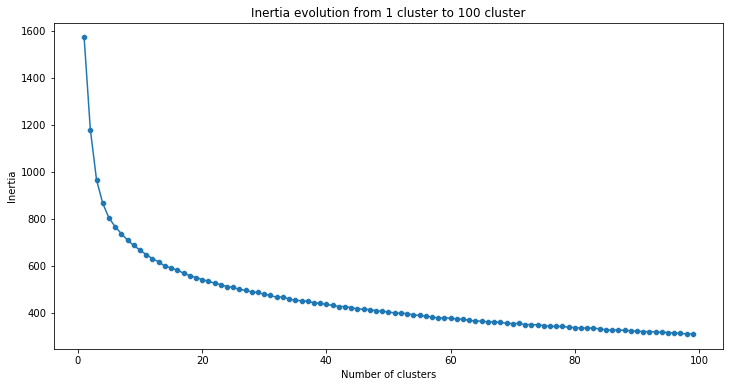

In [87]:
inertia = []
max_k = 100

for k in range(1, max_k):
    k_means = KMeans(n_clusters=k)
    k_means.fit(scaled_audio_features)
    
    inertia.append(round(k_means.inertia_))

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} clusters')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Iterations
#### Try different values of n_init to see if the results improve

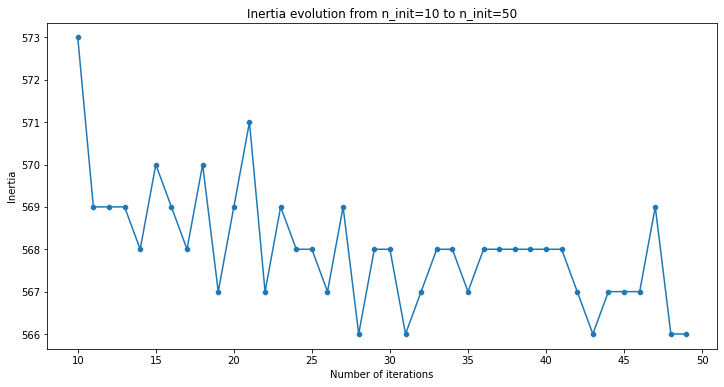

In [92]:
inertia = []
max_n = 50

for n in range(10, max_n):
    k_means = KMeans(n_clusters=17, n_init=n)
    k_means.fit(scaled_audio_features)
    
    inertia.append(round(k_means.inertia_))
    
fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from n_init=10 to n_init={max_n}')
sns.lineplot(x=range(10, max_n), y=inertia)
sns.scatterplot(x=range(10, max_n), y=inertia)
plt.xlabel('Number of iterations')
plt.ylabel('Inertia')
plt.show()

k=17, n_init=27 seem to give the best results

In [94]:
k_means = KMeans(n_clusters=17, n_init=27)
k_means.fit(scaled_audio_features)
scaled_audio_features['cluster'] = k_means.labels_

### Centroids

In [98]:
scaled_audio_features.groupby(by="cluster").mean() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,
0,0.235204,0.188927,0.421475,0.175195,1.0,0.321877,0.819963,0.804182,0.493413,0.247065,0.722217,0.411222
1,0.680148,0.737914,0.751889,0.778562,1.0,0.720873,0.316209,0.046035,0.751179,0.579266,0.523922,0.537656
2,0.172162,0.150004,0.510940,0.151231,0.0,0.311139,0.828089,0.844797,0.495834,0.159006,0.362224,0.462985
3,0.625393,0.606150,0.371972,0.525777,1.0,0.164833,0.389806,0.504254,0.334681,0.777597,0.610884,0.533300
4,0.765820,0.686231,0.840932,0.728249,0.0,0.745083,0.299432,0.173064,0.686248,0.647683,0.537510,0.536301
5,0.129634,0.136017,0.492922,0.131628,1.0,0.361932,0.861044,0.794111,0.466089,0.148164,0.154481,0.393682
6,0.790167,0.494486,0.622054,0.478559,1.0,0.709515,0.474339,0.609386,0.504613,0.746152,0.412432,0.549834
7,0.370916,0.899541,0.567397,0.793604,0.0,0.591249,0.083608,0.657356,0.652207,0.374255,0.719043,0.515035
8,0.751858,0.697745,0.469283,0.746875,1.0,0.767077,0.336944,0.151549,0.181623,0.730360,0.566660,0.552984


In [97]:
# The cluster centers are the mean of the values in each cluster
centroids = k_means.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.235204,0.188927,0.421475,0.175195,1.000000e+00,0.321877,0.819963,0.804182,0.493413,0.247065,0.722217,0.411222
1,0.680148,0.737914,0.751889,0.778562,1.000000e+00,0.720873,0.316209,0.046035,0.751179,0.579266,0.523922,0.537656
2,0.172162,0.150004,0.510940,0.151231,-4.440892e-16,0.311139,0.828089,0.844797,0.495834,0.159006,0.362224,0.462985
3,0.625393,0.606150,0.371972,0.525777,1.000000e+00,0.164833,0.389806,0.504254,0.334681,0.777597,0.610884,0.533300
4,0.765820,0.686231,0.840932,0.728249,-1.110223e-16,0.745083,0.299432,0.173064,0.686248,0.647683,0.537510,0.536301
5,0.129634,0.136017,0.492922,0.131628,1.000000e+00,0.361932,0.861044,0.794111,0.466089,0.148164,0.154481,0.393682
6,0.790167,0.494486,0.622054,0.478559,1.000000e+00,0.709515,0.474339,0.609386,0.504613,0.746152,0.412432,0.549834
7,0.370916,0.899541,0.567397,0.793604,-4.440892e-16,0.591249,0.083608,0.657356,0.652207,0.374255,0.719043,0.515035
8,0.751858,0.697745,0.469283,0.746875,1.000000e+00,0.767077,0.336944,0.151549,0.181623,0.730360,0.566660,0.552984
9,0.475909,0.839095,0.421752,0.722348,1.000000e+00,0.688729,0.166410,0.629388,0.672243,0.491554,0.739224,0.513854


### Silhouette score

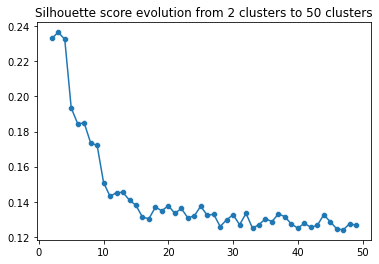

In [128]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []
max_k = 50

for k in range(2, max_k):
    k_means = KMeans(n_clusters=k)
    k_means.fit(scaled_audio_features)
        
    silhouette_score_list.append(silhouette_score(scaled_audio_features, k_means.labels_))

plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=silhouette_score_list)
sns.scatterplot(x=range(2, max_k), y=silhouette_score_list)
plt.show()

### Exploration
Now we will try out different transformers and also removing some columns which may be inaccurate to see if our results improve

When all columns are included, k=6,12/13 show peaks in silhouette score

In [483]:
def look_for_number_of_clusters(scaled_audio_features):
    inertia = []
    silhouette_score_list = []
    max_k = 40

    for k in range(2, max_k):
        k_means = KMeans(n_clusters=k, n_init=27, random_state=123)
        k_means.fit(scaled_audio_features)

        inertia.append(k_means.inertia_)
        silhouette_score_list.append(silhouette_score(scaled_audio_features, k_means.labels_))

    # Plot inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 1 cluster to {max_k} clusters')
    sns.lineplot(x=range(2, max_k), y=inertia)
    sns.scatterplot(x=range(2, max_k), y=inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Plot silhouette score
    plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
    sns.lineplot(x=range(2, max_k), y=silhouette_score_list)
    sns.scatterplot(x=range(2, max_k), y=silhouette_score_list)
    plt.show()

def assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means):
    
    dist_cols = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']
    
    centroids = pd.DataFrame(k_means.cluster_centers_, columns=scaled_audio_features.columns)
    scaled_audio_features['cluster'] = k_means.labels_
        
    scaled_audio_features['dist_to_centroid'] = scaled_audio_features.apply(
        lambda row: distance.euclidean(row[dist_cols], centroids.loc[row.cluster]), 
        axis=1
    )
    
    print('inertia: ', k_means.inertia_)
    print('silhouette_score: ', silhouette_score(scaled_audio_features, k_means.labels_))
    
    return scaled_audio_features

#### MinMaxScaler

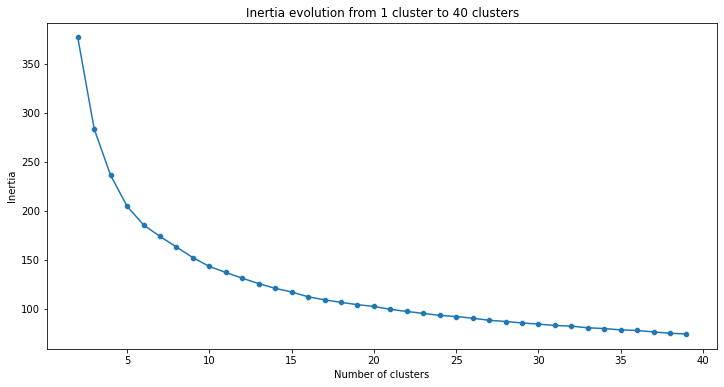

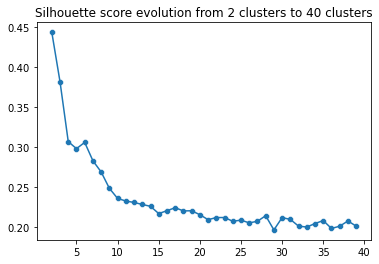

In [481]:
'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
audio_features = df_audio_features.copy()
audio_features.drop(['duration_ms', 'speechiness', 'key', 'loudness', 'time_signature', 'liveness', 'mode'], inplace=True, axis=1)

transformer = MinMaxScaler(feature_range=(0,1))
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)

In [484]:
# Transform data and strip unnecessary columns
audio_features = df_audio_features.copy()
audio_features.drop(['duration_ms', 'speechiness', 'key', 'loudness', 'time_signature', 'liveness', 'mode'], inplace=True, axis=1)

transformer = MinMaxScaler(feature_range=(0,1))
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

# Check the best values
k_means = KMeans(n_clusters=6, n_init=27, random_state=123)
k_means.fit(scaled_audio_features)

scaled_audio_features = assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means)
scaled_audio_features.head()

inertia:  185.62379963549648
silhouette_score:  0.6337285318141009


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Elvis Presley,Don't Be Cruel,0.704777,0.552200,0.859437,0.000035,0.853947,0.224187,1,0.371614
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.580938,0.247977,0.453814,0.000009,0.591879,0.494567,1,0.332763
The Platters,Smoke Gets In Your Eyes,0.254755,0.227896,0.947791,0.000081,0.211726,0.412383,5,0.119877
Ray Charles,"What'd I Say, Pt. 1 & 2",0.531181,0.683728,0.811245,0.000000,0.802155,0.247063,1,0.355113
Ella Fitzgerald,Dream A Little Dream Of Me,0.437196,0.167654,0.921687,0.000000,0.398177,0.168742,5,0.302097


In [553]:
''' This configuration looks promising '''

cluster_num = 5
print(scaled_audio_features[scaled_audio_features.cluster==cluster_num].shape)
scaled_audio_features[scaled_audio_features.cluster==cluster_num].sort_values('dist_to_centroid').head(30)

(68, 8)


danceability  \
artist                    name                                                               
Carl Philipp Emanuel Bach Symphony No. 1 in D major, Wq. 183/1: Symphony ...     -1.116498   
Doris Day                 Dream a Little Dream of Me (with Paul Weston & ...     -0.692374   
Nat King Cole             Unforgettable                                          -0.859317   
                          Unforgettable                                          -0.859317   
WorshipMob                Lean Back                                              -0.841269   
Gioachino Rossini         La Cenerentola / Act 2: "Non più mesta"                -0.403609   
John Denver               Annie's Song                                           -0.967604   
Fleetwood Mac             Landslide                                              -0.566039   
Dolly Parton              I Will Always Love You                                 -0.421657   
The Rolling Stones        Wild Horses - 2009 Mix                                 -0.484824   
Marvin Hamlisch           Nobody Does It Better                                  -0.773589   
Georges Bizet             Bizet: Carmen, Act 1: "L'amour est un oiseau re...     -0.751030   
Kelly Price               Faith That Conquers                                    -0.936020   
Keith Jarrett             Questar                                                -0.322394   
Yusuf / Cat Stevens       Morning Has Broken                                     -0.520920   
John Legend               All of Me                                              -0.529944   
Giacomo Puccini           La Bohème / Act 2: "Quando m'en vo" - Live             -1.296976   
Gaetano Donizetti         Don Pasquale / Act 3: "Com'è gentil...tornami a...     -1.139058   
Chet Baker                My Funny Valentine                                     -0.457752   
Tasha Cobbs Leonard       For Your Glory - 1 Mic 1 Take                          -0.538968   
Gioachino Rossini         Péchés de vieillesse / Vol. III: Tirana pour de...     -0.511896   
Adele                     All I Ask                                               0.237089   
Elton John                Your Song                                               0.065635   
Billy Joel                She's Always a Woman                                   -1.116498   
Tye Tribbett              Anyhow - Radio Edit                                    -0.525432   
John Coltrane             My One And Only Love                                   -0.353977   
Giuseppe Verdi            Il Trovatore / Act 2: "Vedi! le fosche notturne...     -0.448728   
John Coltrane             Naima                                                  -1.066867   
Louis Armstrong           Summertime                                             -1.531598   
Richard Wagner            Tannhäuser, WWV 70 / Act 2: "Dich, teure Halle,...     -1.364656   

                                                                                energy  \
artist                    name                                                           
Carl Philipp Emanuel Bach Symphony No. 1 in D major, Wq. 183/1: Symphony ... -1.214828   
Doris Day                 Dream a Little Dream of Me (with Paul Weston & ... -1.353497   
Nat King Cole             Unforgettable                                      -1.150827   
                          Unforgettable                                      -1.150827   
WorshipMob                Lean Back                                          -0.777487   
Gioachino Rossini         La Cenerentola / Act 2: "Non più mesta"            -0.869933   
John Denver               Annie's Song                                       -0.702819   
Fleetwood Mac             Landslide                                          -1.225495   
Dolly Parton              I Will Always Love You                             -1.293052   
The Rolling Stones        Wild Horses - 2009 Mix                             -0

#### QuantileTransformer

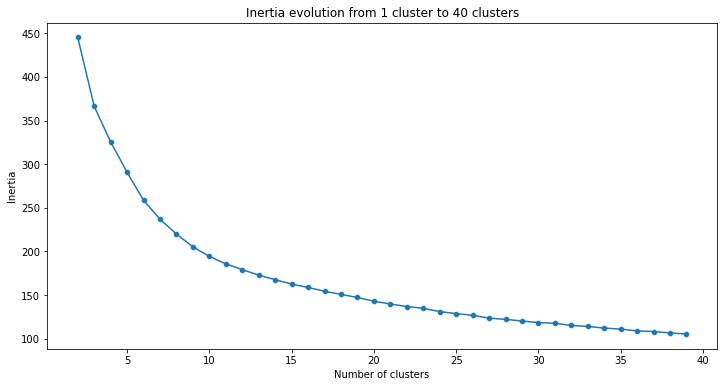

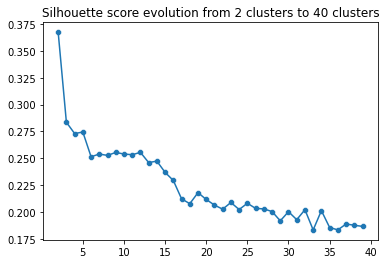

In [491]:
'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
audio_features = df_audio_features.copy()
audio_features.drop(['duration_ms', 'speechiness', 'key', 'loudness', 'time_signature', 'liveness', 'mode'], inplace=True, axis=1)

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)

In [554]:
# Transform data and strip unnecessary columns
audio_features = df_audio_features.copy()
audio_features.drop(['duration_ms', 'speechiness', 'key', 'loudness', 'time_signature', 'liveness', 'mode'], inplace=True, axis=1)

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)
# Check the best values
k_means = KMeans(n_clusters=13, n_init=27, random_state=123)
k_means.fit(scaled_audio_features)

scaled_audio_features = assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means)
scaled_audio_features.head()

inertia:  172.74544076970037
silhouette_score:  0.6377351481428206


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Elvis Presley,Don't Be Cruel,0.724387,0.508509,0.742743,0.462492,0.877377,0.182312,11,0.441781
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.531031,0.241742,0.531930,0.413417,0.605105,0.670612,4,0.307320
The Platters,Smoke Gets In Your Eyes,0.176176,0.224224,0.860861,0.490929,0.249639,0.534636,6,0.386647
Ray Charles,"What'd I Say, Pt. 1 & 2",0.450938,0.665165,0.705426,0.000000,0.818868,0.220450,3,0.551006
Ella Fitzgerald,Dream A Little Dream Of Me,0.328282,0.176176,0.811812,0.000000,0.418418,0.083071,12,0.270831


In [563]:
cluster_num = 8
print(scaled_audio_features[scaled_audio_features.cluster==cluster_num].shape)
scaled_audio_features[scaled_audio_features.cluster==cluster_num].sort_values('dist_to_centroid').head(30)

(106, 8)


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Lacuna Coil,Heaven's a Lie,0.298298,0.917313,0.051715,0.632340,0.395395,0.776660,8,0.119901
System Of A Down,Chop Suey!,0.287287,0.957601,0.035176,0.582059,0.317995,0.671685,8,0.149006
Sepultura,Roots Bloody Roots,0.300300,0.908909,0.033694,0.714495,0.270983,0.582397,8,0.186747
Pantera,Cowboys from Hell,0.279204,0.942442,0.077710,0.709557,0.453453,0.537501,8,0.195712
Epica,Sensorium,0.492492,0.991992,0.037012,0.686927,0.493493,0.711180,8,0.201287
System Of A Down,Sugar,0.326326,0.925685,0.055856,0.620368,0.602135,0.705684,8,0.221065
Nightwish,Nemo,0.379379,0.747473,0.020602,0.496478,0.389056,0.646353,8,0.224432
Bullet For My Valentine,Your Betrayal,0.501385,0.919920,0.012939,0.489917,0.388008,0.731763,8,0.229274
Soil,Halo,0.429429,0.950105,0.006757,0.604887,0.476755,0.509600,8,0.229807


#### StandardScaler

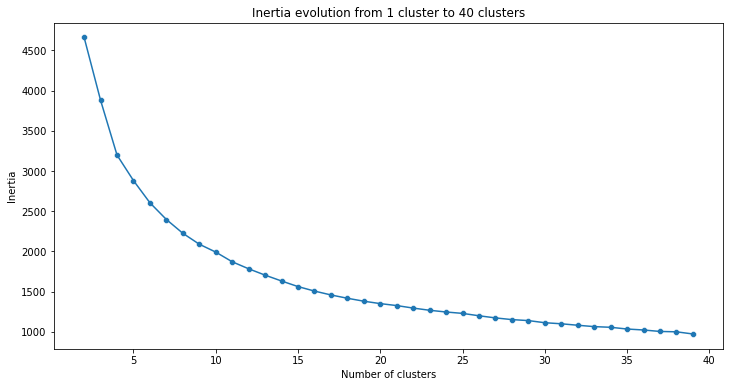

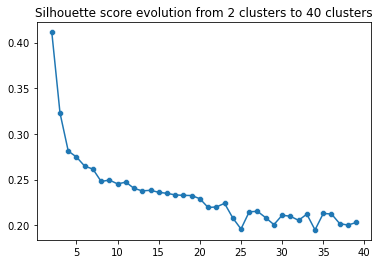

In [513]:
'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
audio_features = df_audio_features.copy()
audio_features.drop(['duration_ms', 'speechiness', 'key', 'loudness', 'time_signature', 'liveness', 'mode'], inplace=True, axis=1)

transformer = StandardScaler()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)

In [514]:
# Transform data and strip unnecessary columns
audio_features = df_audio_features.copy()
audio_features.drop(['duration_ms', 'speechiness', 'key', 'loudness', 'time_signature', 'liveness', 'mode'], inplace=True, axis=1)

transformer = StandardScaler()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

# Check the best values
k_means = KMeans(n_clusters=23, n_init=27, random_state=123)
k_means.fit(scaled_audio_features)

scaled_audio_features = assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means)
scaled_audio_features.head()

inertia:  1268.149839202221
silhouette_score:  0.5295002671245589


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Elvis Presley,Don't Be Cruel,0.710845,0.157640,1.067684,-0.548259,1.256492,-0.965795,6,0.995084
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.205506,-0.919712,-0.014861,-0.548335,0.384789,0.357552,19,0.928511
The Platters,Smoke Gets In Your Eyes,-1.125522,-0.990824,1.303486,-0.548124,-0.879697,-0.044690,3,0.753319
Ray Charles,"What'd I Say, Pt. 1 & 2",0.002467,0.623426,0.939065,-0.548362,1.084219,-0.853829,20,1.191760
Ella Fitzgerald,Dream A Little Dream Of Me,-0.381049,-1.204161,1.233817,-0.548362,-0.259513,-1.237164,15,0.228841


In [535]:
cluster_num = 19
print(scaled_audio_features[scaled_audio_features.cluster==cluster_num].shape)
scaled_audio_features[scaled_audio_features.cluster==cluster_num].sort_values('dist_to_centroid').head(30)

(69, 8)


danceability  \
artist                           name                                                               
Lee Konitz                       I Remember You                                          0.110754   
                                 Two Not One                                             0.381472   
Hank Williams                    Your Cheatin' Heart                                     0.598046   
Ella Fitzgerald                  Cheek To Cheek                                          0.489759   
Etta Jones                       Bye Bye Blackbird                                       0.769500   
Sarah Vaughan                    Lullaby Of Birdland                                     0.173922   
Ella Fitzgerald                  Cheek To Cheek                                          0.521343   
Wolfgang Amadeus Mozart          Die Zauberflöte / Act 2: "Pa-Pa-Pa-Pa-Pa-Pa-Pap...      0.043075   
Art Blakey & The Jazz Messengers Hipsippy Blues                                          0.151362   
The Everly Brothers              All I Have to Do Is Dream                               0.011491   
Lloyd Price                      I'm Gonna Get Married                                   0.133314   
Paul Desmond                     The Way You Look Tonight - 2003 Remastered              0.737917   
Count Basie                      Splanky                                                 0.196482   
Frank Sinatra                    Love & Marriage                                         0.679261   
Stevie Wonder                    You Are The Sunshine Of My Life                        -0.092284   
Louis Prima                      Just A Gigolo - Remastered                             -0.065212   
Anita O'Day                      Love For Sale                                          -0.182523   
Billie Holiday                   Blue Moon                                               0.449151   
                                 Blue Moon                                               0.449151   
Antonio Vivaldi                  Vivaldi: Orlando furioso, RV 728: "Ah fuggi rap...      0.200994   
Justin Bieber                    Love Yourself                                           0.313793   
Jackie McLean                    Blues Inn - Remastered                                  0.196482   
John Coltrane                    Blue Train - Remastered 2003                           -0.150939   
Sonny Clark                      Cool Struttin'                                          0.182946   
Patsy Cline                      Walkin' After Midnight                                  0.101731   
Art Blakey & The Jazz Messengers Close Your Eyes                                         0.115266   
Frankie Avalon                   Venus - Bonus Track                                    -0.060700   
Perry Como                       Magic Moments                                           0.787548   
Frank Sinatra                    Fly Me To The Moon - Remastered                         0.589022   
                                 I've Got You Under My Skin - Remastered 1998            0.205506   

                                                                                       energy  \
artist                           name                                                           
Lee Konitz                       I Remember You                                     -0.713486   
                                 Two Not One                                        -0.436148   
Hank Williams                    Your Cheatin' Heart                                -0.933934   
Ella Fitzgerald                  Cheek To Cheek                                     -0.709930   
Etta Jones                       Bye Bye Blackbird                                  -0.667263   
Sarah Vaughan                    Lullaby Of Birdland                                -0.549928   
Ella Fitzgerald                  Cheek To Cheek                             

#### RobustScaler

In [536]:
'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
audio_features = df_audio_features.copy()
audio_features.drop(['duration_ms', 'speechiness', 'key', 'loudness', 'time_signature', 'liveness', 'mode'], inplace=True, axis=1)

transformer = StandardScaler()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

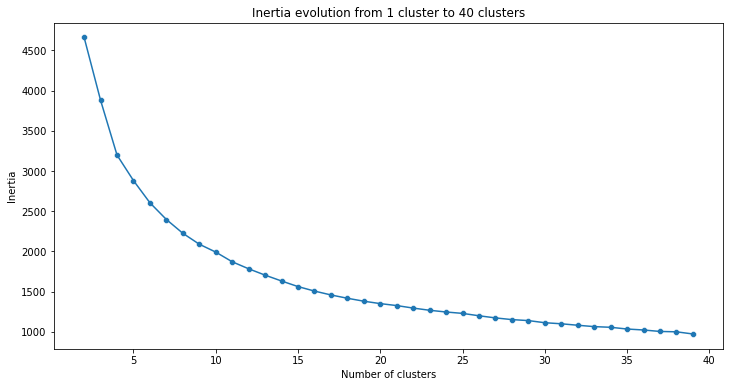

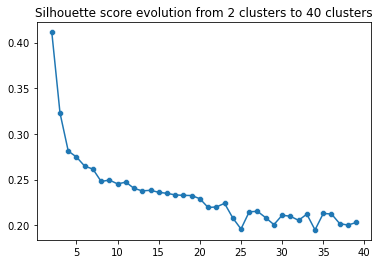

In [537]:
look_for_number_of_clusters(scaled_audio_features)

In [538]:
# Transform data and strip unnecessary columns
audio_features = df_audio_features.copy()
audio_features.drop(['duration_ms', 'speechiness', 'key', 'loudness', 'time_signature', 'liveness', 'mode'], inplace=True, axis=1)

transformer = StandardScaler()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

# Check the best values
k_means = KMeans(n_clusters=11, n_init=27, random_state=123)
k_means.fit(scaled_audio_features)

scaled_audio_features = assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means)
scaled_audio_features.head()

inertia:  1871.0447392851727
silhouette_score:  0.4803661092898679


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Elvis Presley,Don't Be Cruel,0.710845,0.157640,1.067684,-0.548259,1.256492,-0.965795,8,1.223844
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.205506,-0.919712,-0.014861,-0.548335,0.384789,0.357552,8,1.269296
The Platters,Smoke Gets In Your Eyes,-1.125522,-0.990824,1.303486,-0.548124,-0.879697,-0.044690,4,0.922874
Ray Charles,"What'd I Say, Pt. 1 & 2",0.002467,0.623426,0.939065,-0.548362,1.084219,-0.853829,8,1.321106
Ella Fitzgerald,Dream A Little Dream Of Me,-0.381049,-1.204161,1.233817,-0.548362,-0.259513,-1.237164,4,0.963518


In [547]:
cluster_num = 8
print(scaled_audio_features[scaled_audio_features.cluster==cluster_num].shape)
scaled_audio_features[scaled_audio_features.cluster==cluster_num].sort_values('dist_to_centroid').head(30)

(146, 8)


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
The Everly Brothers,All I Have to Do Is Dream,0.011491,-0.564150,0.872076,-0.548362,0.402016,-0.374964,8,0.471437
Justin Bieber,Love Yourself,0.313793,-0.453926,1.011413,-0.548362,0.122933,-0.477805,8,0.510060
Dolly Parton,Here You Come Again,0.205506,0.018971,0.507655,-0.527387,0.250416,-0.306559,8,0.576327
Keith Jarrett,One For Majid - Live,0.029539,-0.653040,0.547848,-0.458771,0.029906,-0.613677,8,0.591006
Sam Smith,Too Good At Goodbyes,0.638653,-0.475260,0.488898,-0.548362,-0.011440,-0.744831,8,0.660827
Louis Armstrong,Mack the Knife,0.602558,-0.457482,0.344201,-0.548362,0.805136,-0.835454,8,0.674599
Art Blakey & The Jazz Messengers,Quick Trick,0.322816,-0.763265,0.823844,-0.547963,0.188397,-1.008263,8,0.692398
Dion & The Belmonts,A Teenager In Love,0.070147,-0.457482,0.571964,-0.548362,0.481262,-1.147541,8,0.692603
Lee Konitz,Two Not One,0.381472,-0.436148,0.454063,-0.548346,0.670763,0.056808,8,0.708179
